In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

import numpy  as np
import pandas as pd

import os

DETDIR='.'
pars = ['cosmic','neutrino']
files= ['all_dets_cosmic_resnet.txt','all_dets_valids_resnet.txt']

In [2]:
dframes = {}
for ix,par in enumerate(pars):
    frames = pd.read_csv(os.path.join(DETDIR,files[ix]),
                         delimiter=' ',names=['file','prob','xmin','ymin','xmax','ymax'])
    dframes[par] = frames

In [3]:
ious = []
probs = []
im_df = {}
for model in pars:
    pred_df = dframes[model]
    im = {}
    for ix,image in enumerate(pred_df.file.unique()):
        df = pred_df[pred_df['file'] == image].sort_values(by='prob',ascending=False)
        top = df.iloc[0] # take only the top prediction
        im[image] = {'top_pred_class':1.0,'top_prob':top['prob']}
        
    im_df[model] = pd.DataFrame(im).T

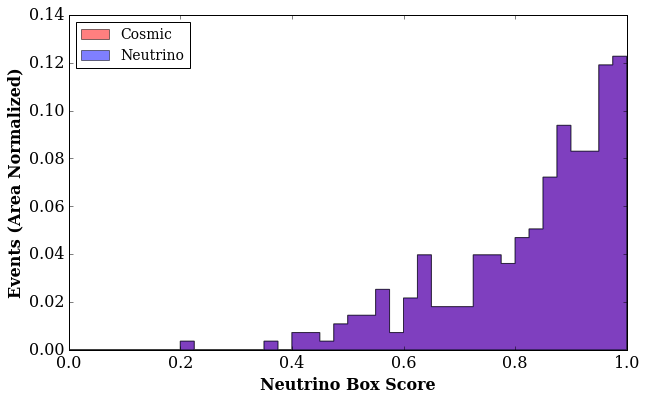

In [4]:
matplotlib.rcParams['font.size'] =16
matplotlib.rcParams['font.style'] ='normal'
matplotlib.rcParams['font.family'] ='serif'

fig, ax = plt.subplots(figsize=(10,6))
div=0.025
bins = np.arange(0,1.0+div,div)
cosmics   = im_df['cosmic']['top_prob'].values
neutrinos = im_df['neutrino']['top_prob'].values

cosmo = np.array([1/float(cosmics.size) for _ in xrange(cosmics.size)])
neuo  = np.array([1/float(neutrinos.size) for _ in xrange(neutrinos.size)])

s = cosmics.size
cc1=ax.hist(cosmics,weights=cosmo,
            bins=bins,color='red',alpha=0.5,histtype='stepfilled',label='Cosmic')
s = neutrinos.size
cc2= ax.hist(neutrinos,weights=neuo,
            bins=bins,color='blue',alpha=0.5,histtype='stepfilled',label='Neutrino')
ax.set_xlabel("Neutrino Box Score",fontweight='bold')
ax.set_ylabel("Events (Area Normalized)",fontweight='bold')
ax.set_title("")
ax.legend(loc='upper left',fontsize=14)
#plt.savefig('nu_v_cosmics_valid.pdf', format='pdf', dpi=1000) 
plt.show()

In [5]:
from larcv import larcv
larcv.load_pyutil

larcv.larcv::load_pyutil

In [6]:
iom=larcv.IOManager()
iom.add_in_file("/stage2/drinkingkazu/brett/nu_1plane/bnb_xiao_scaled.root")
#iom.add_in_file("/stage2/drinkingkazu/brett/nu_train.root")
iom.initialize()

True

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: DeprecationWarning: PyArray_FromDimsAndDataAndDescr: use PyArray_NewFromDescr.


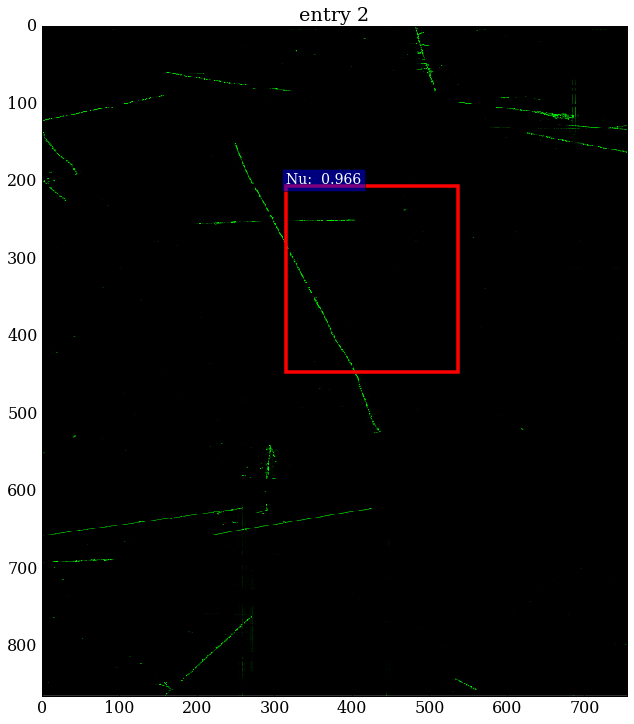

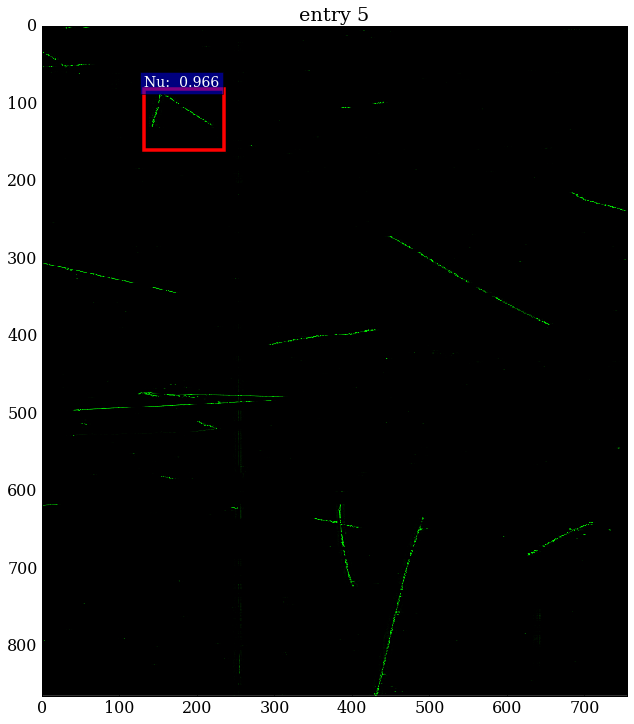

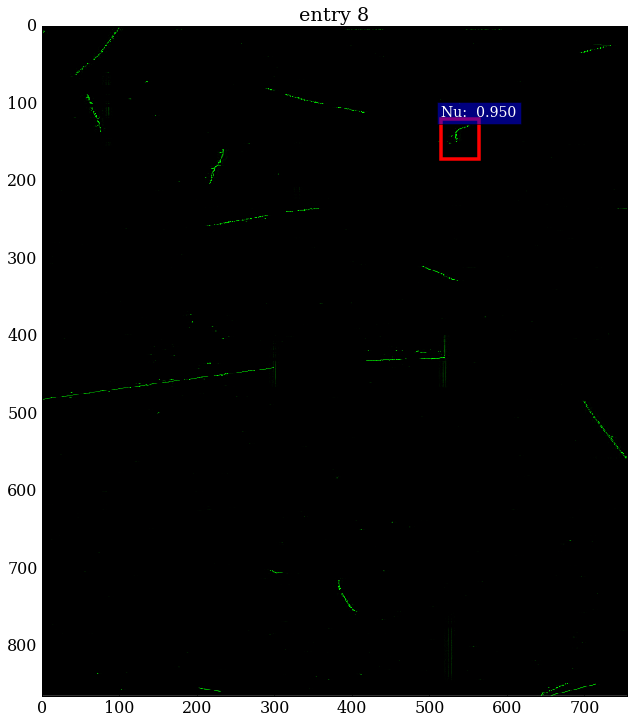

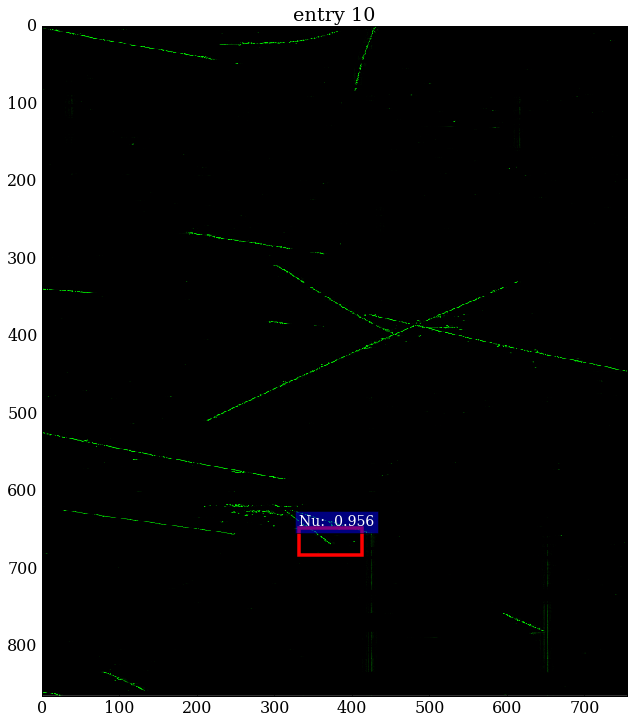

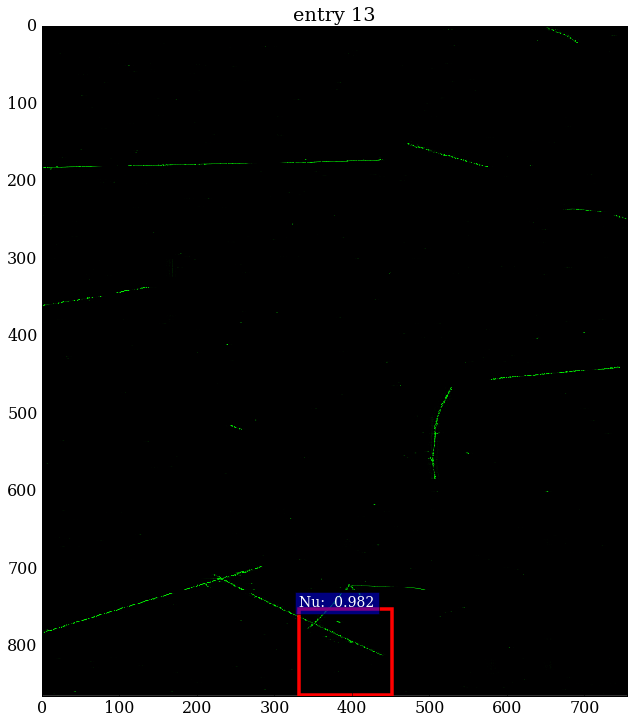

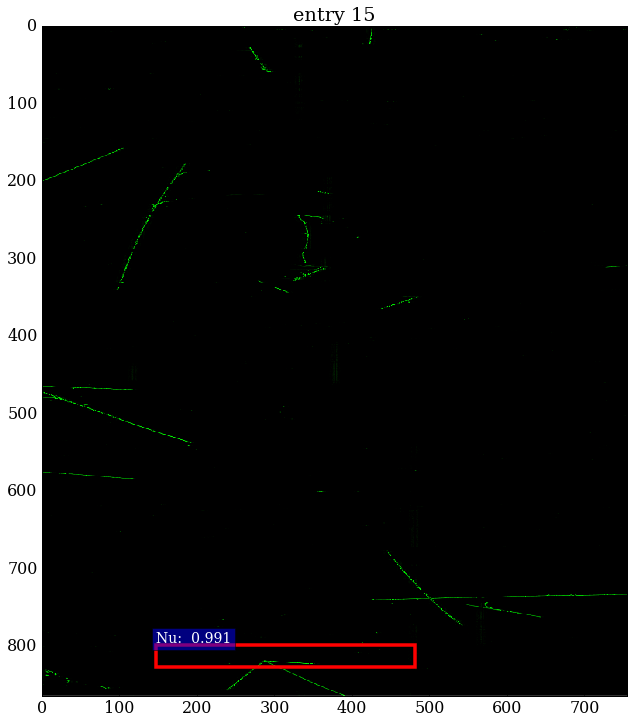

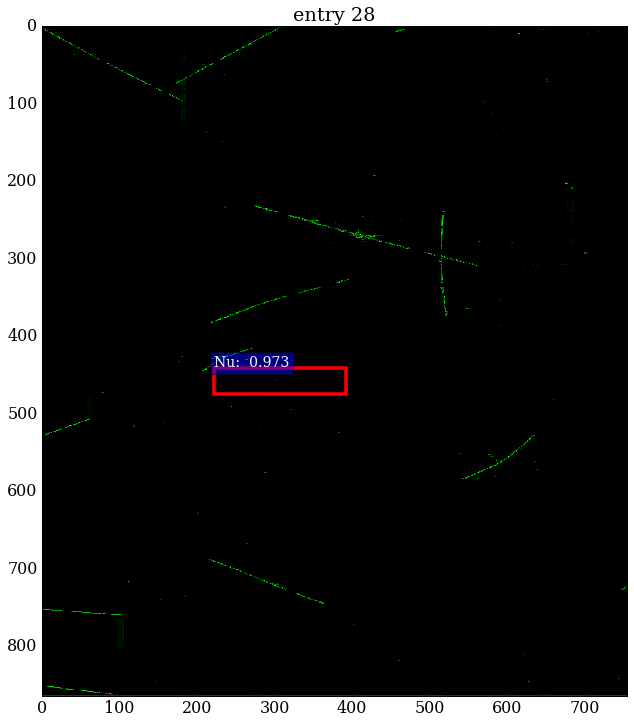

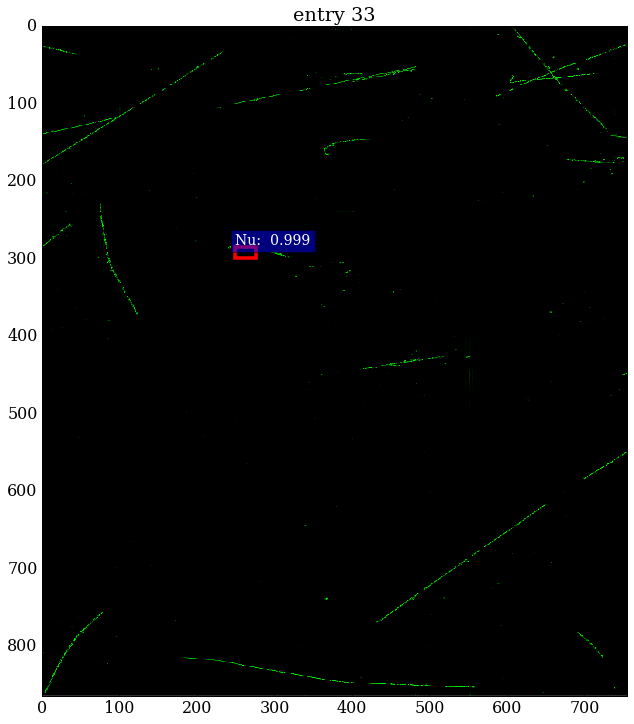

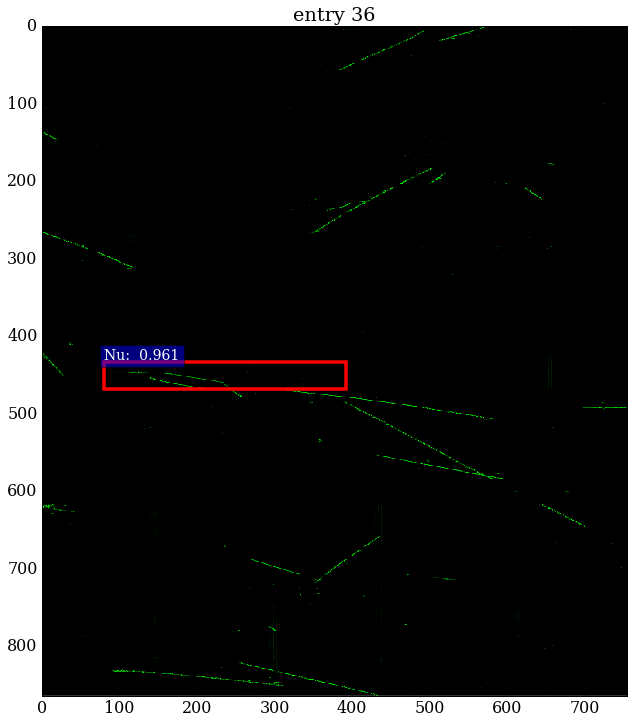

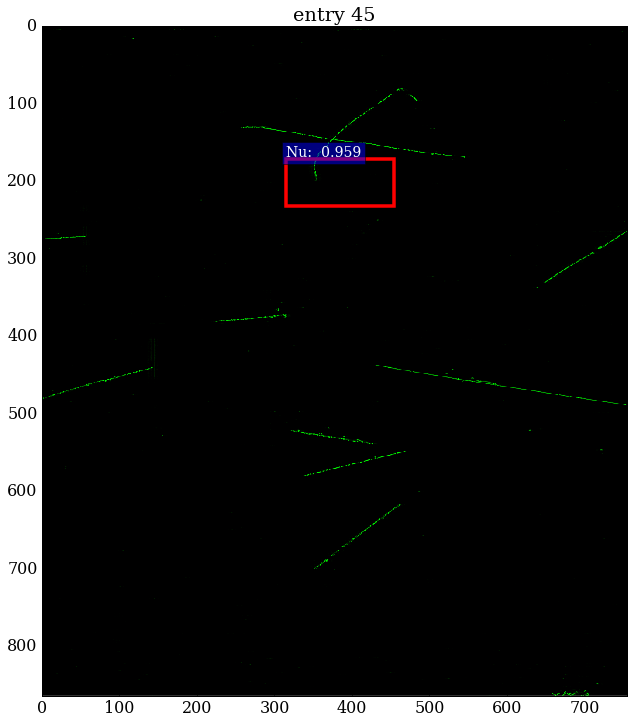

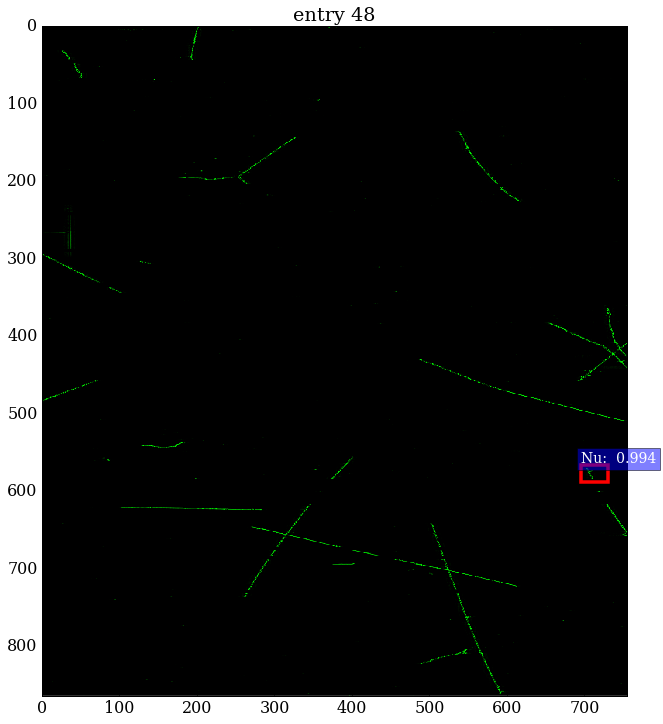

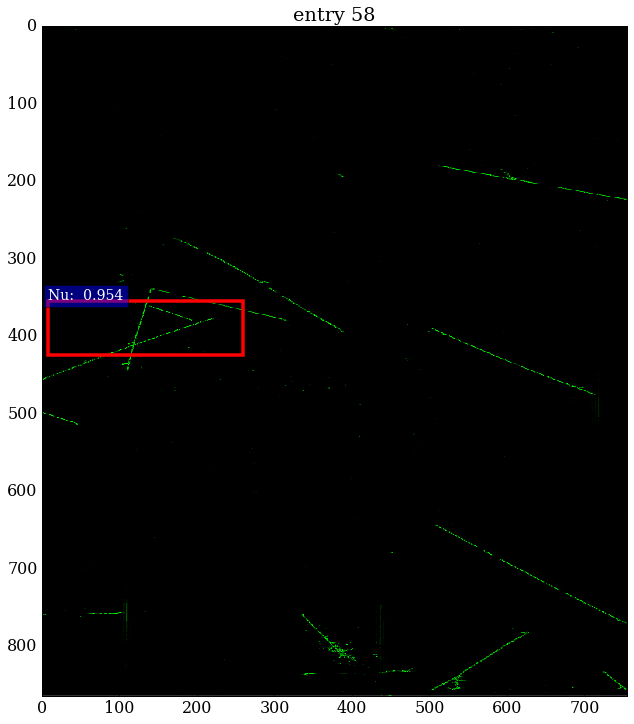

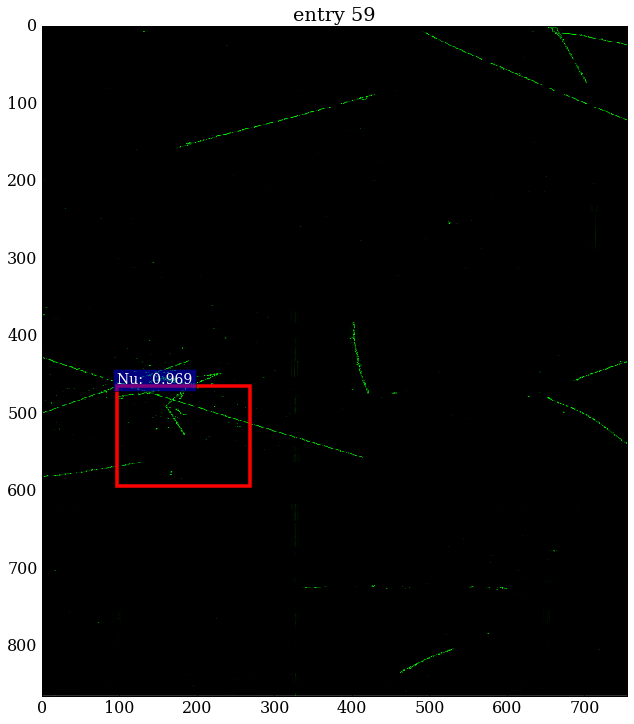

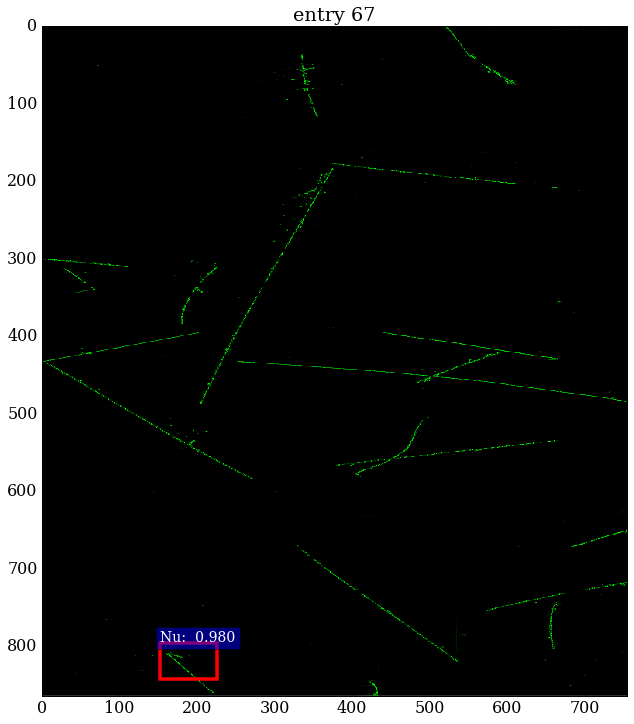

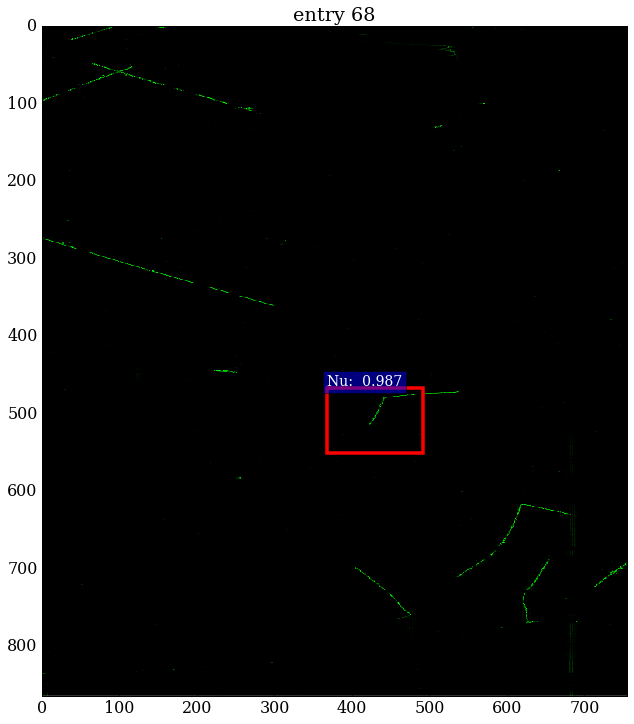

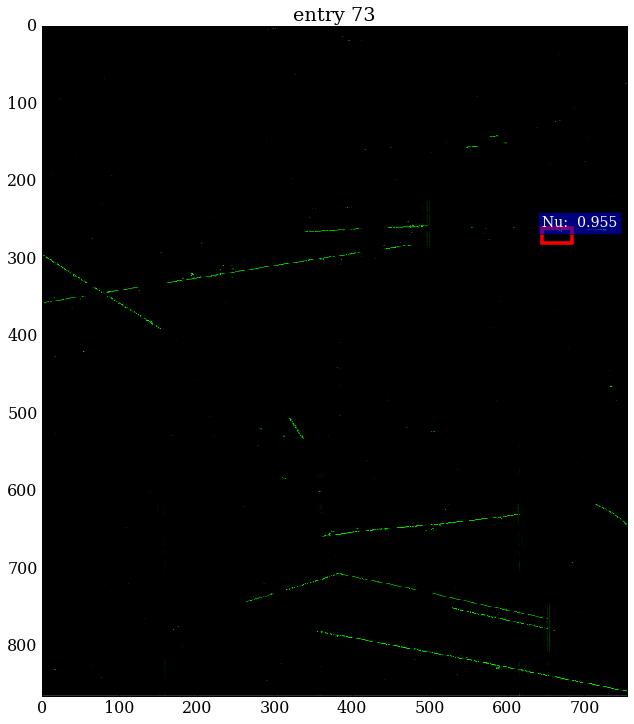

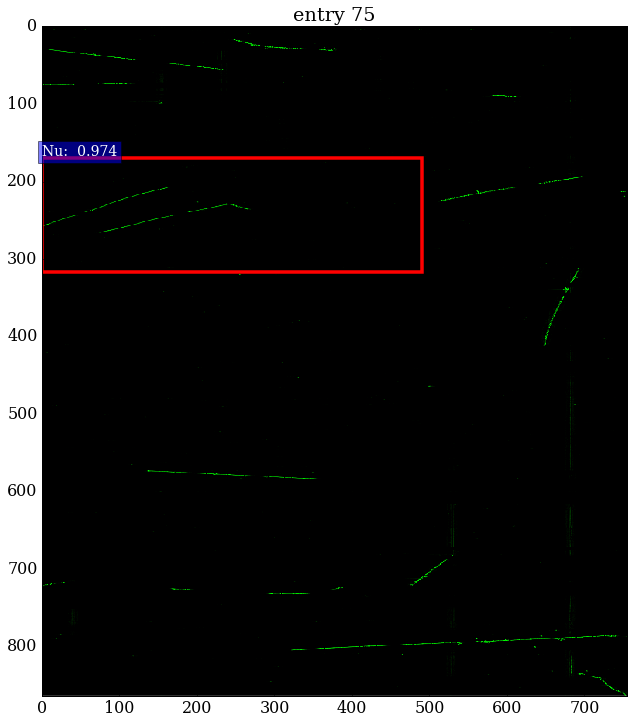

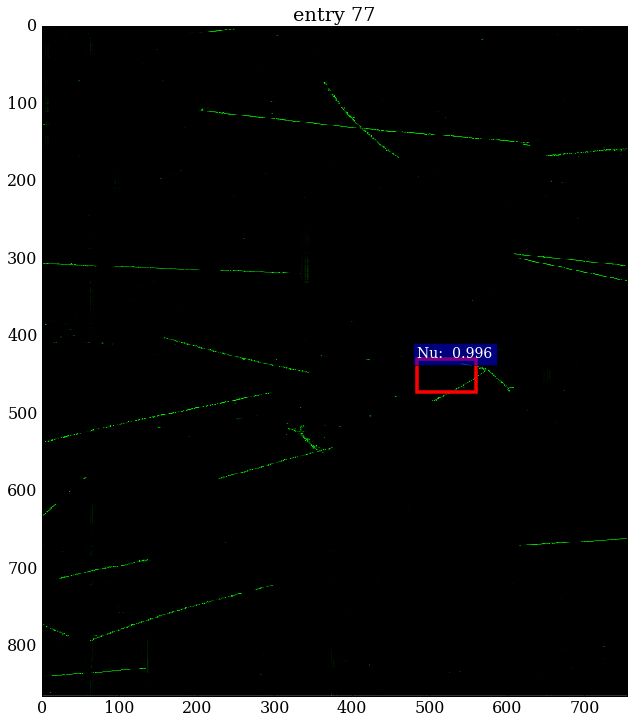

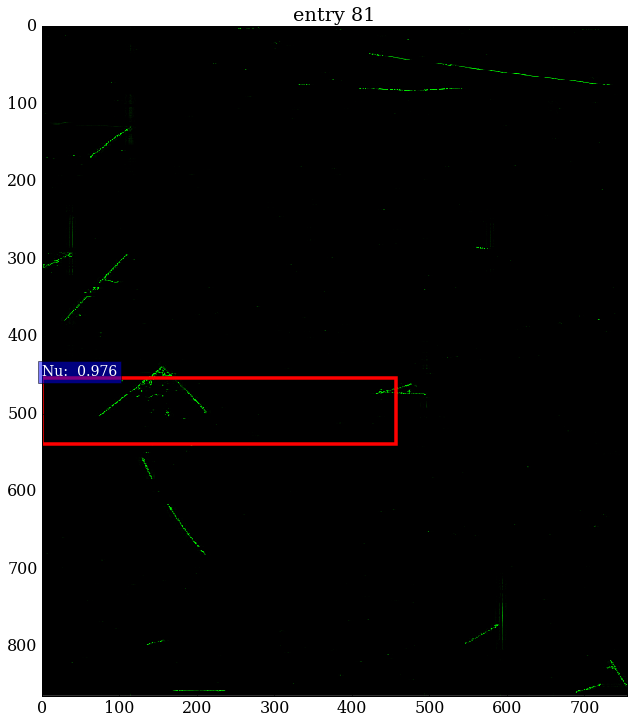

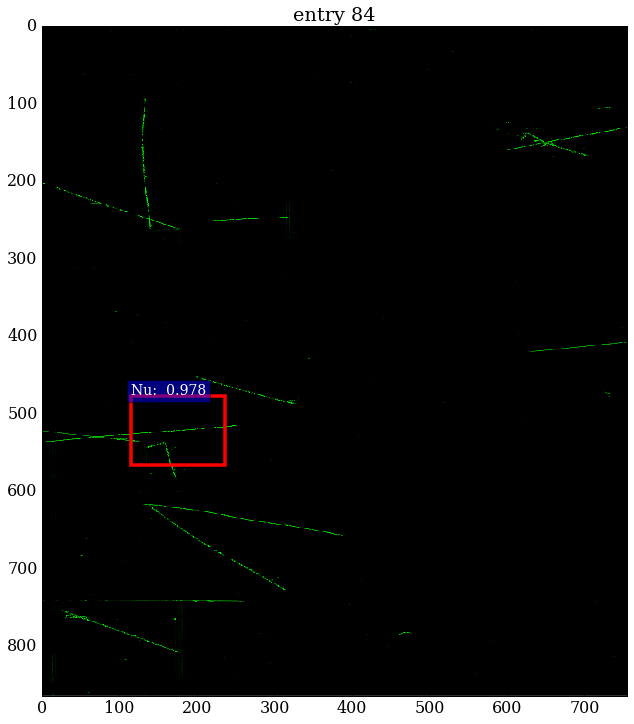

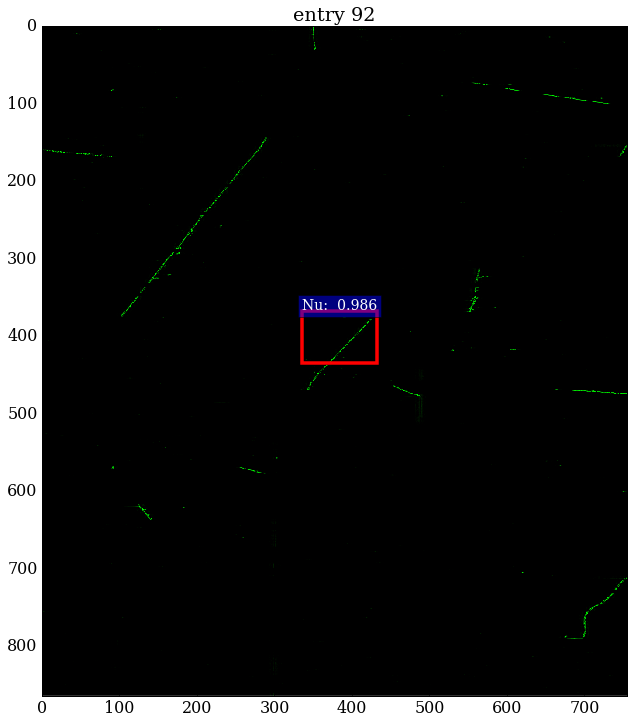

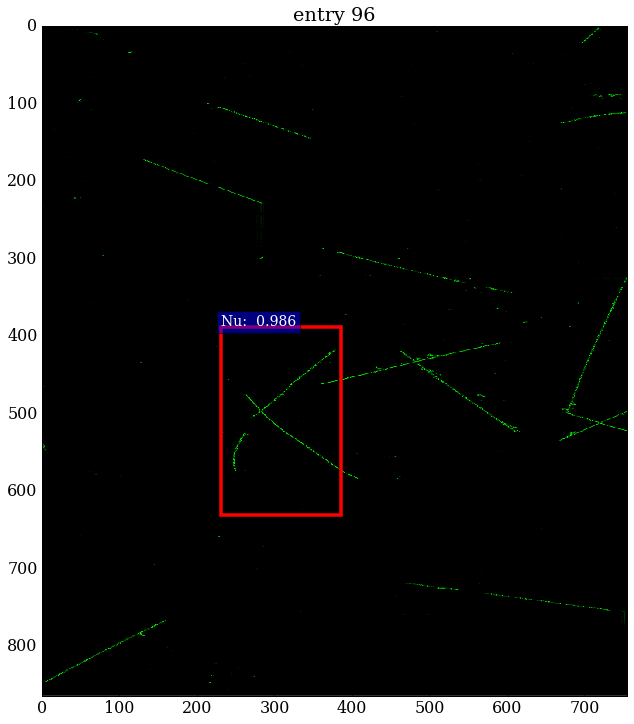

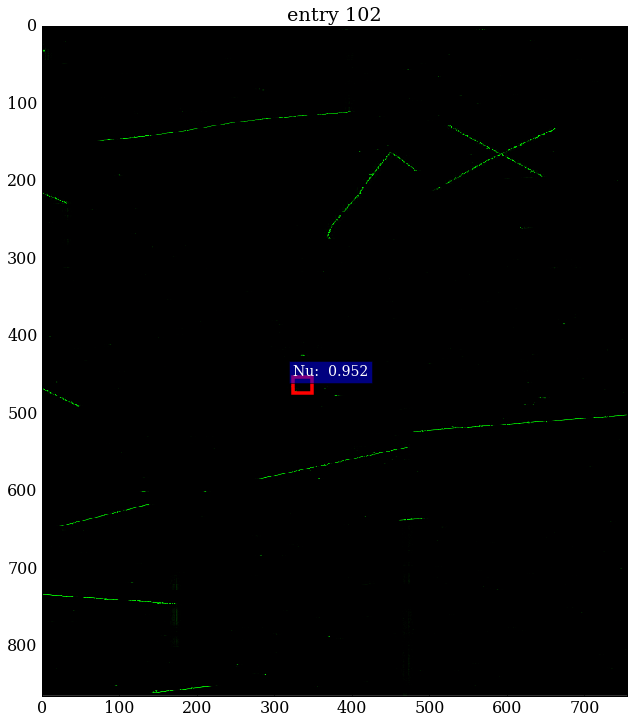

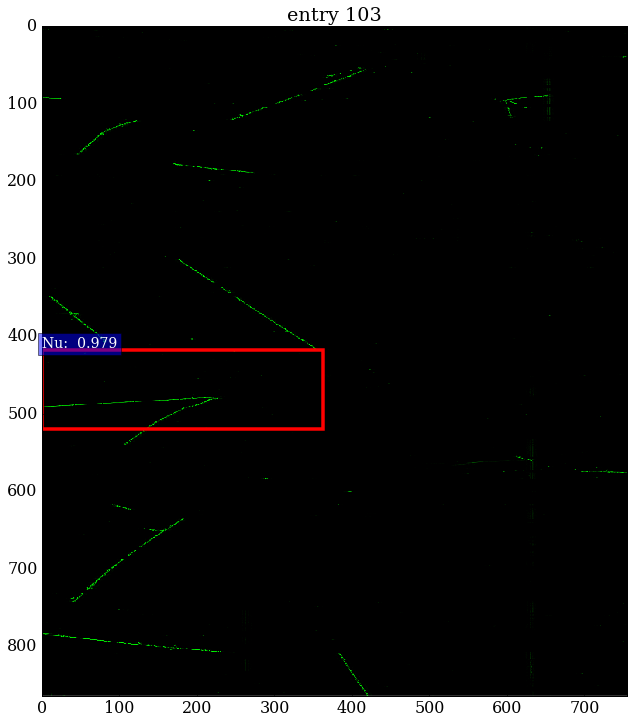

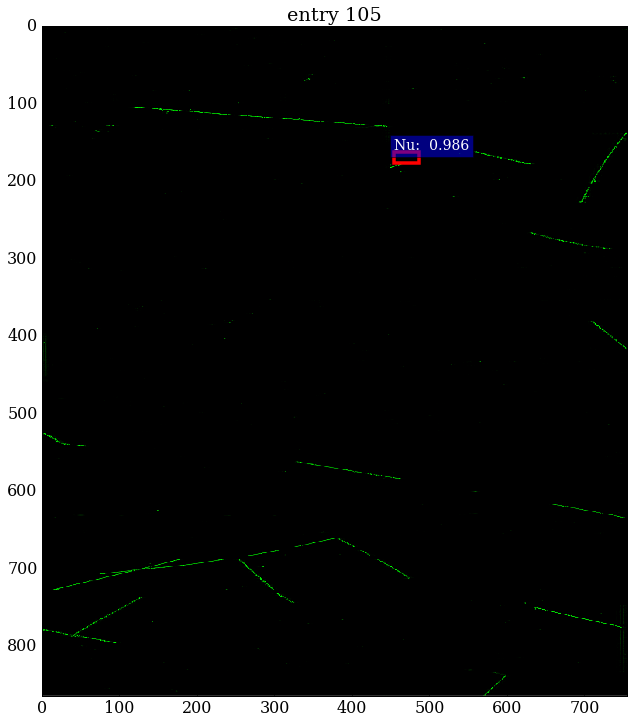

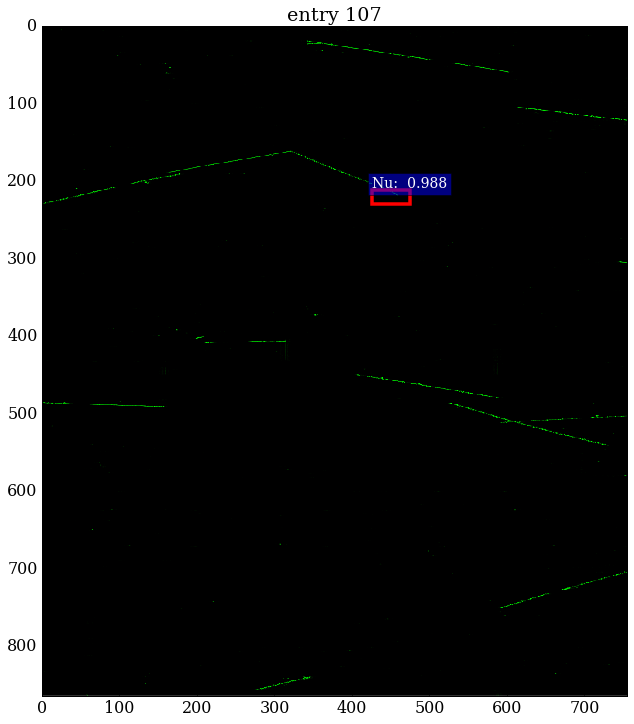

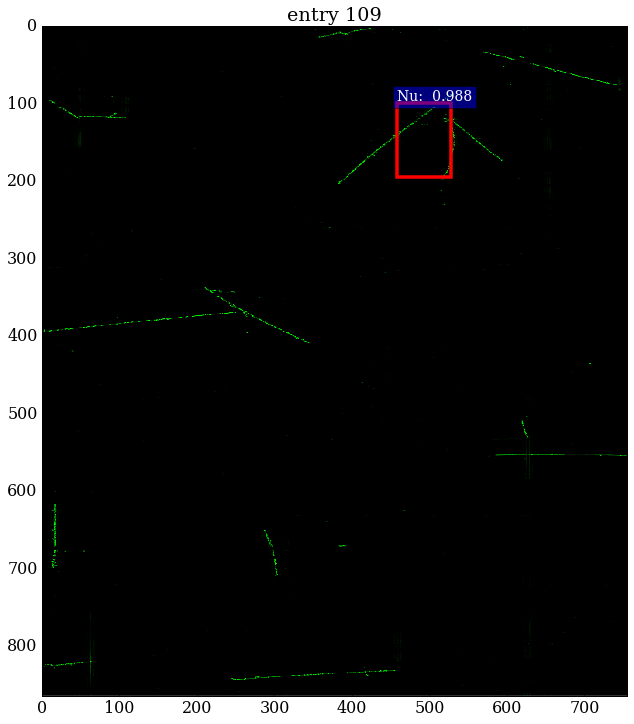

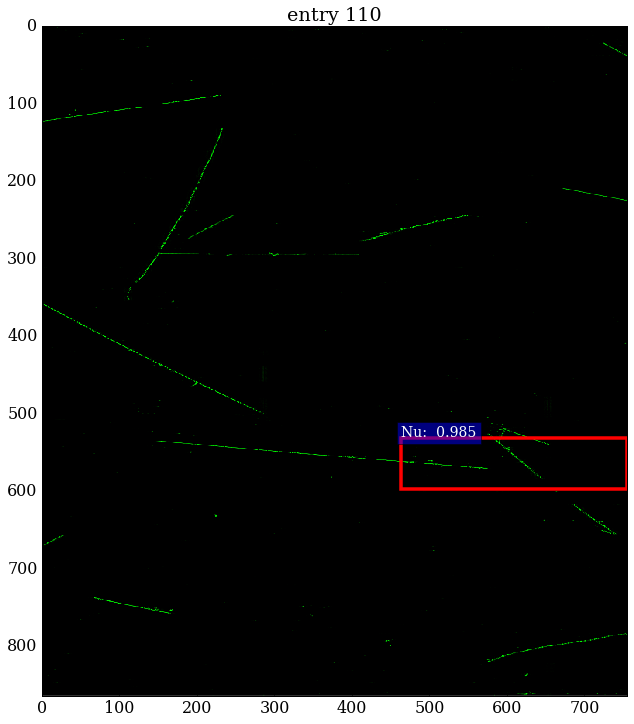

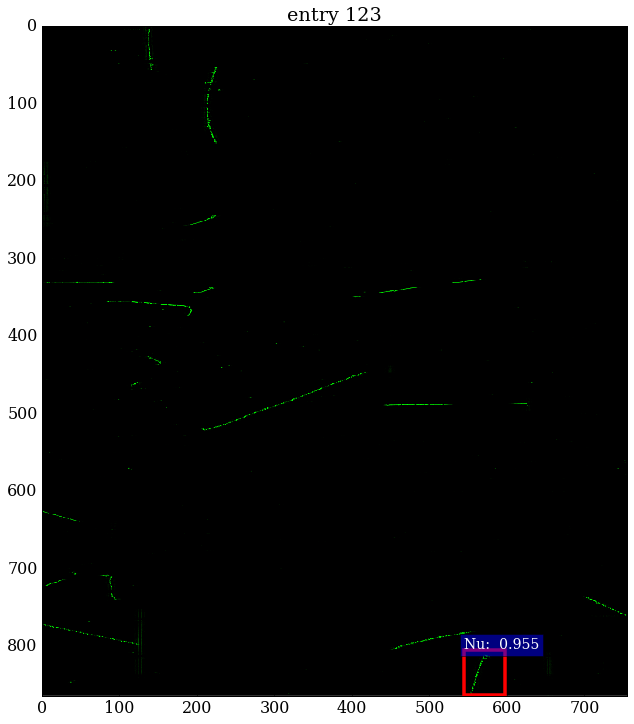

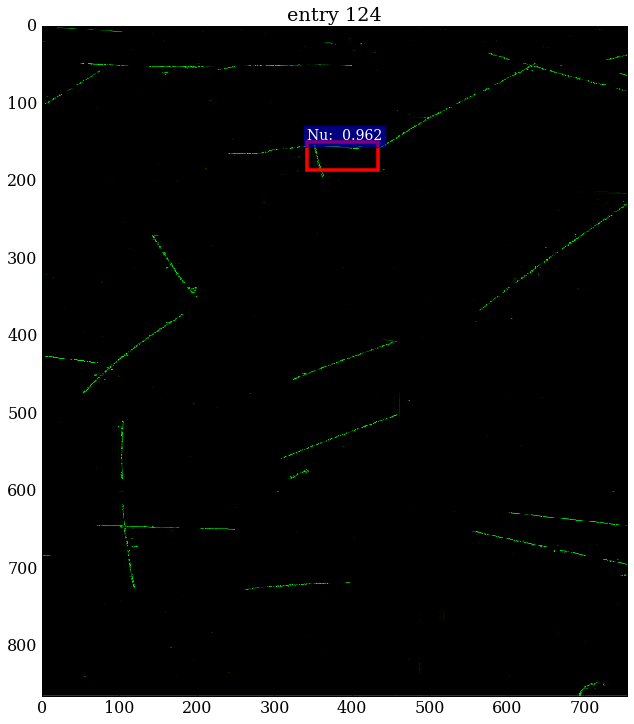

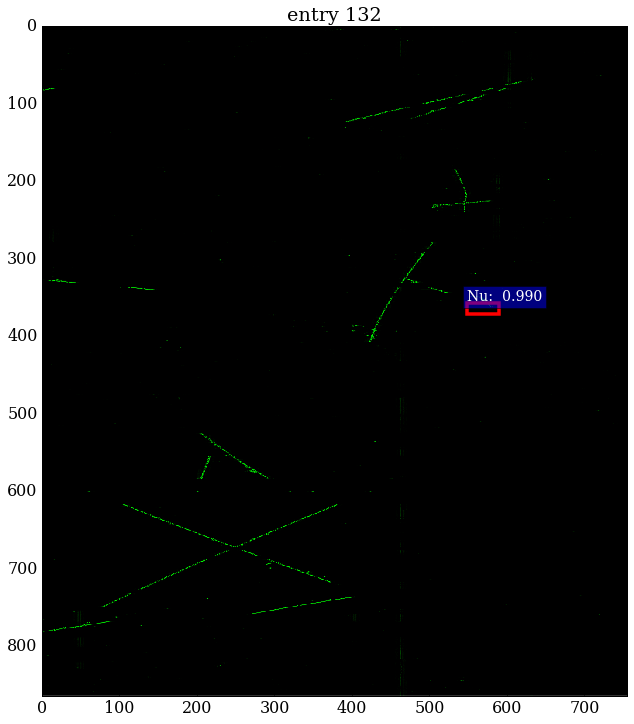

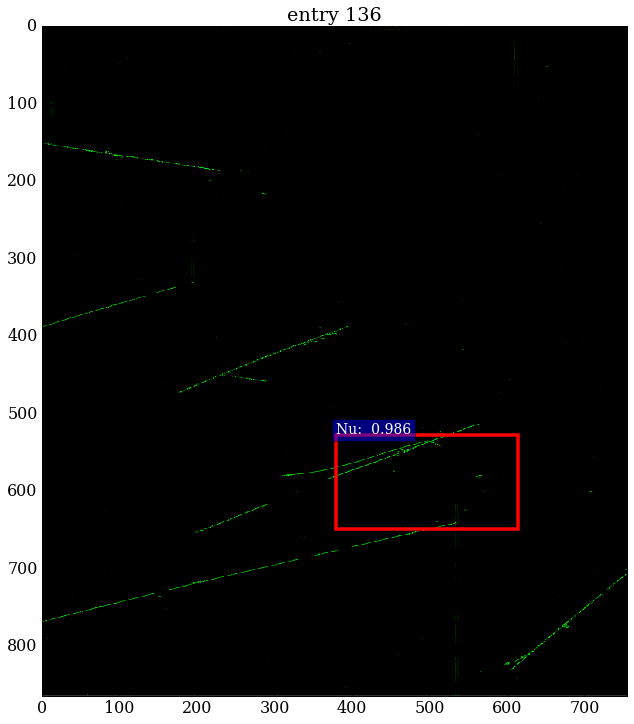

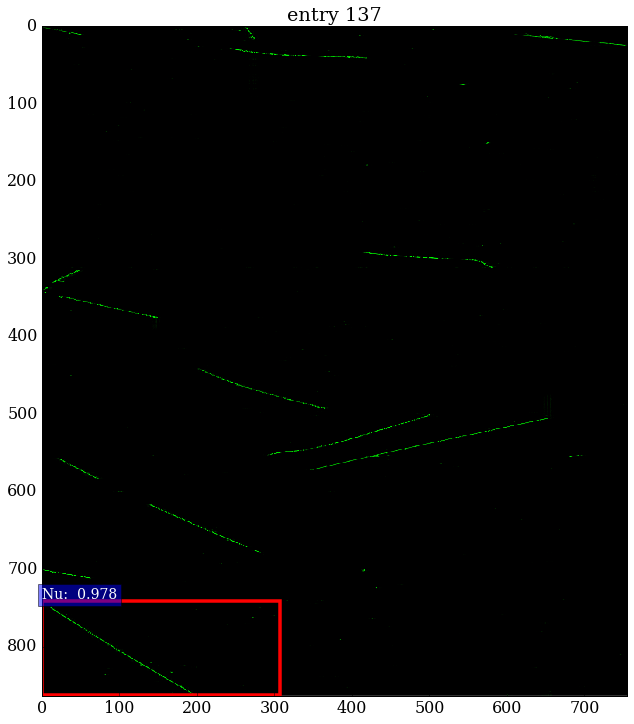

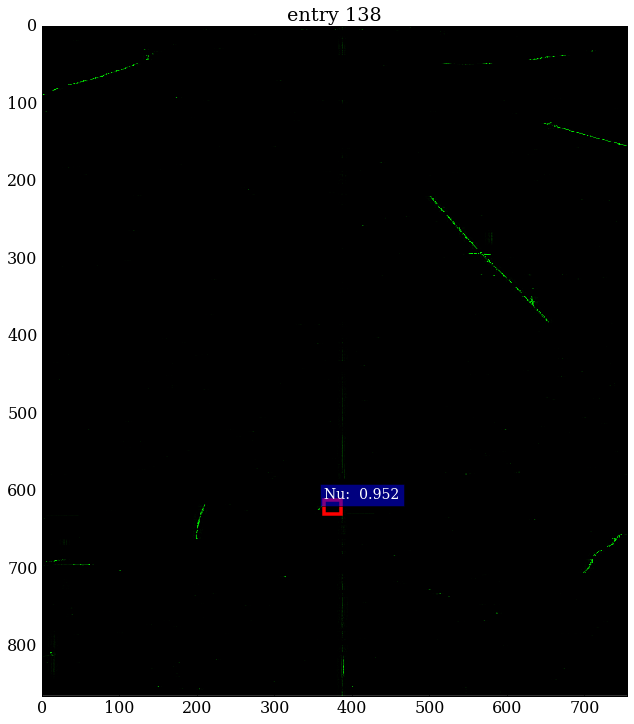

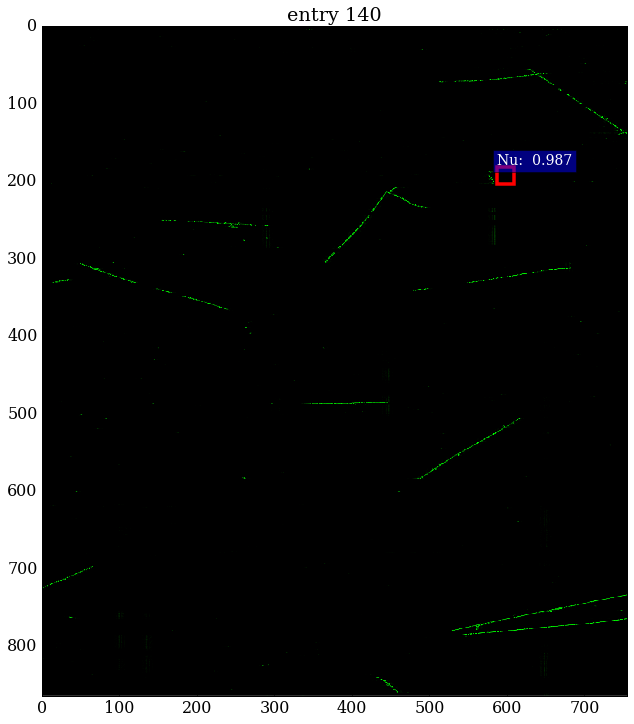

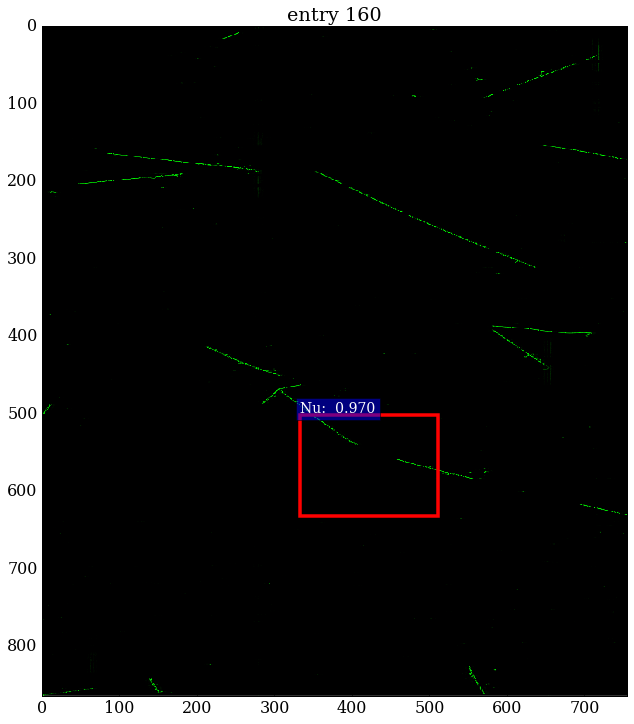

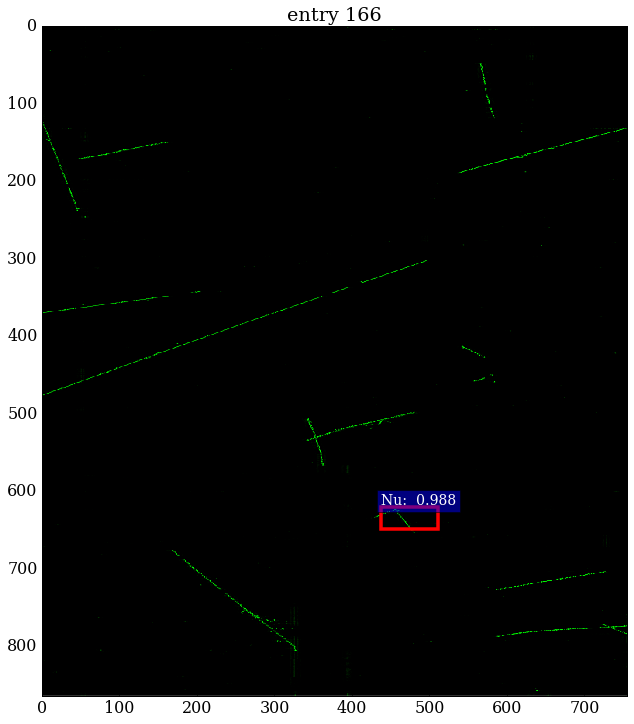

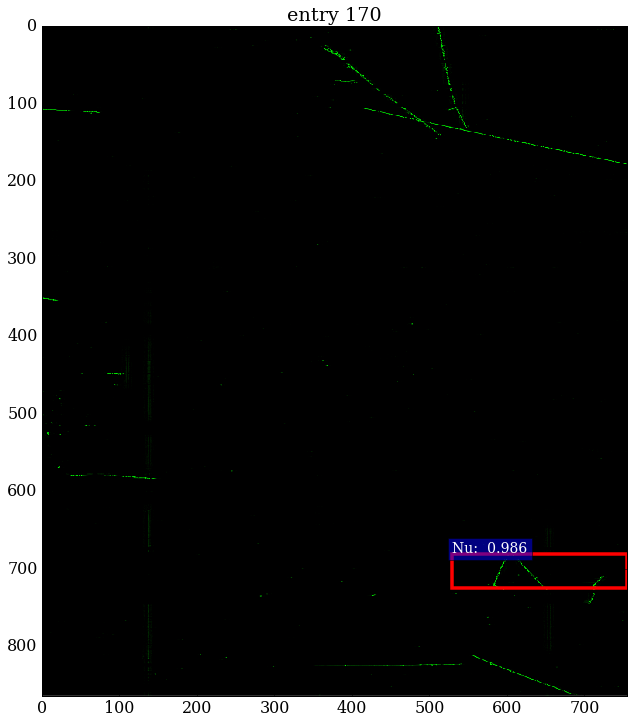

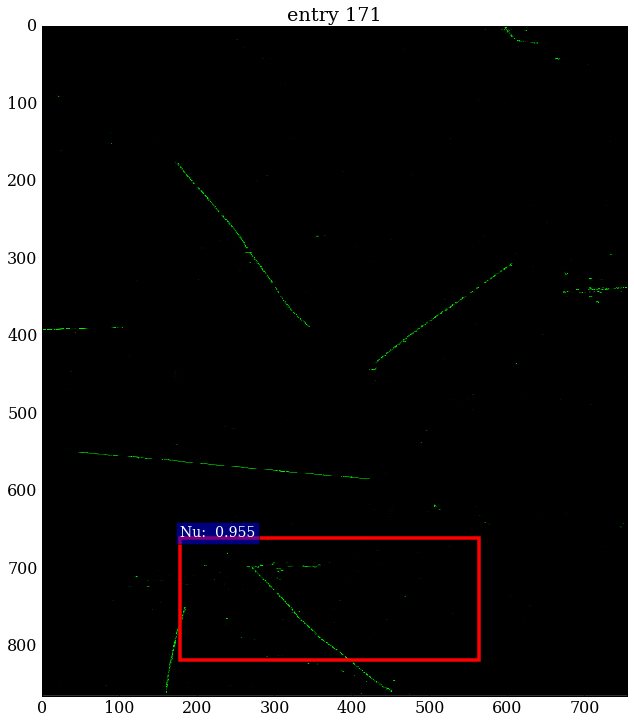

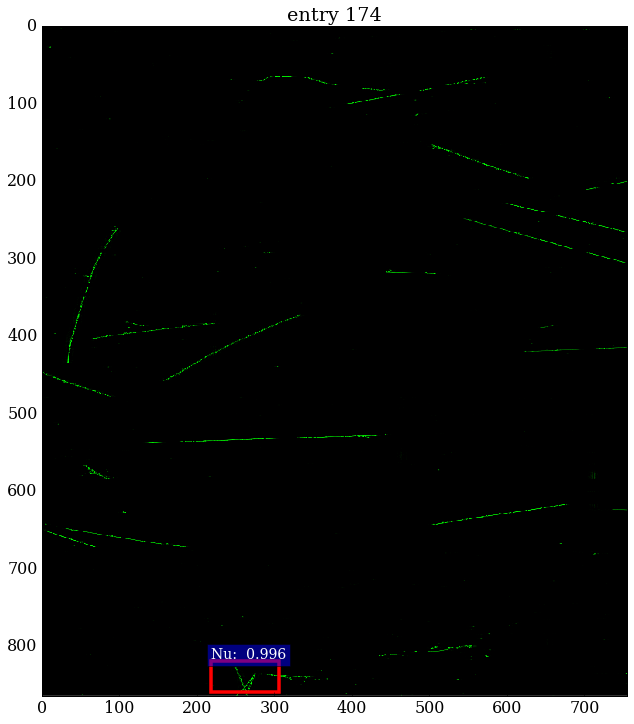

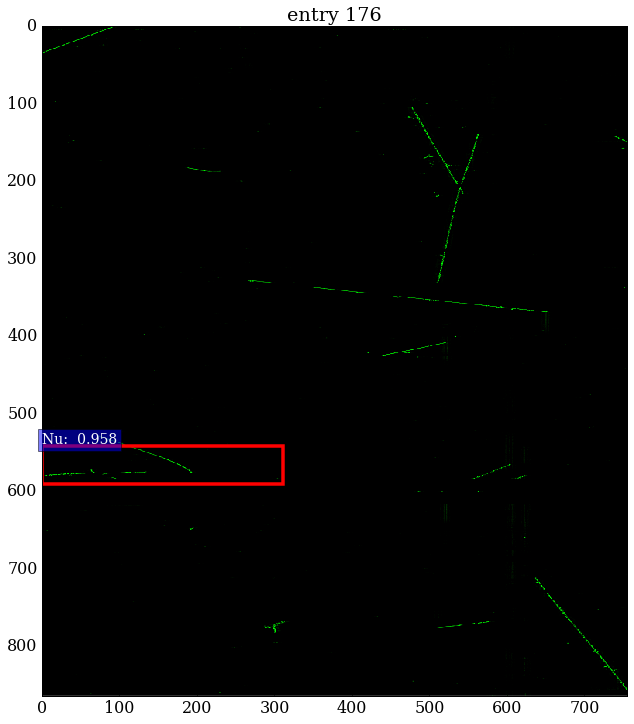

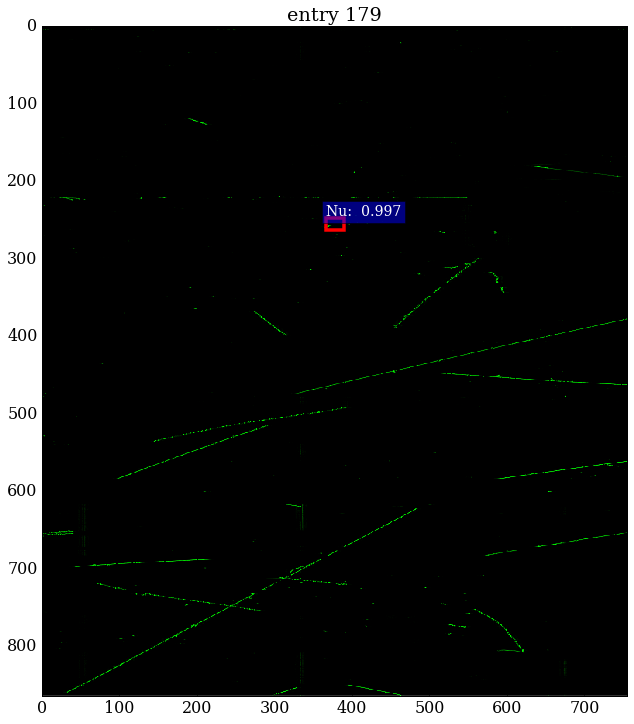

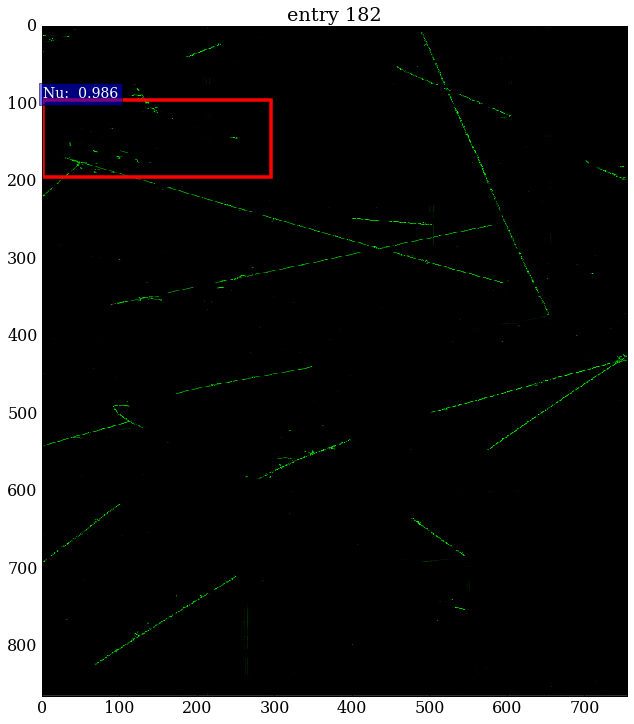

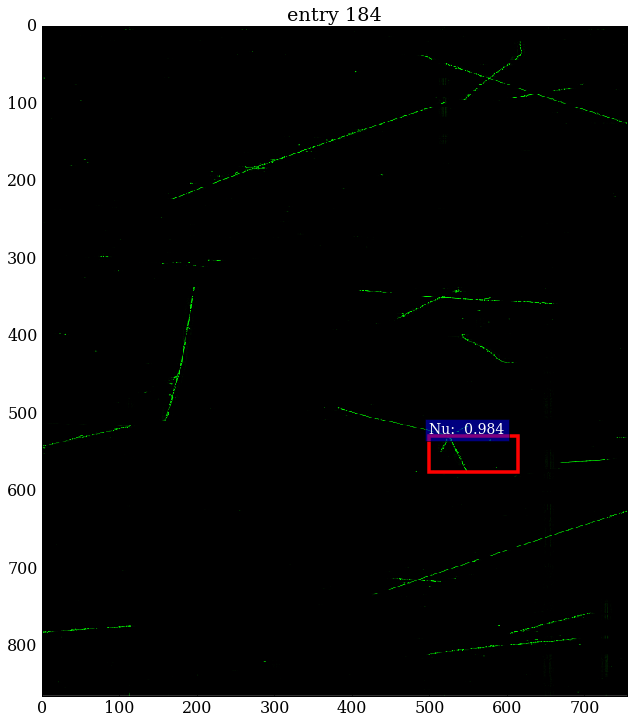

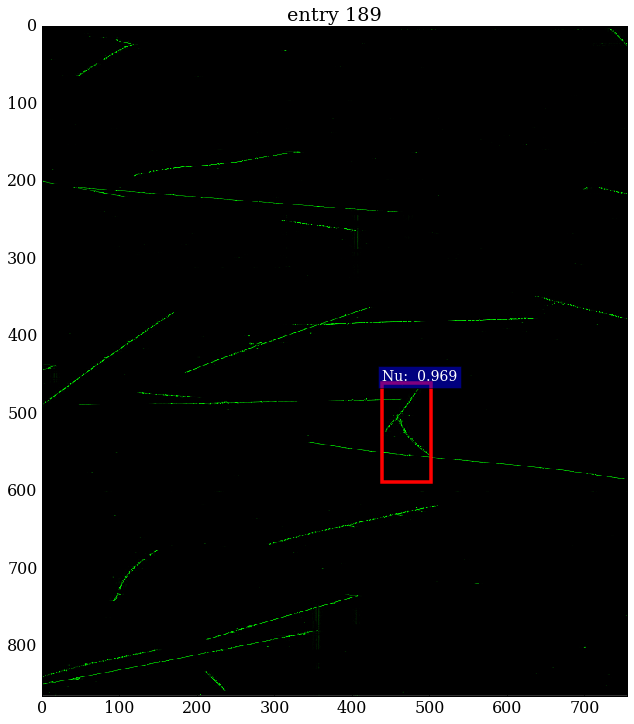

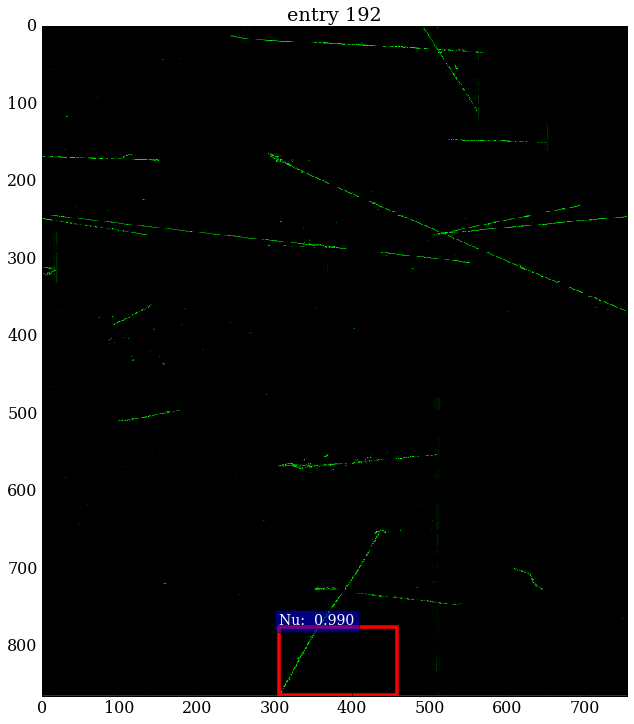

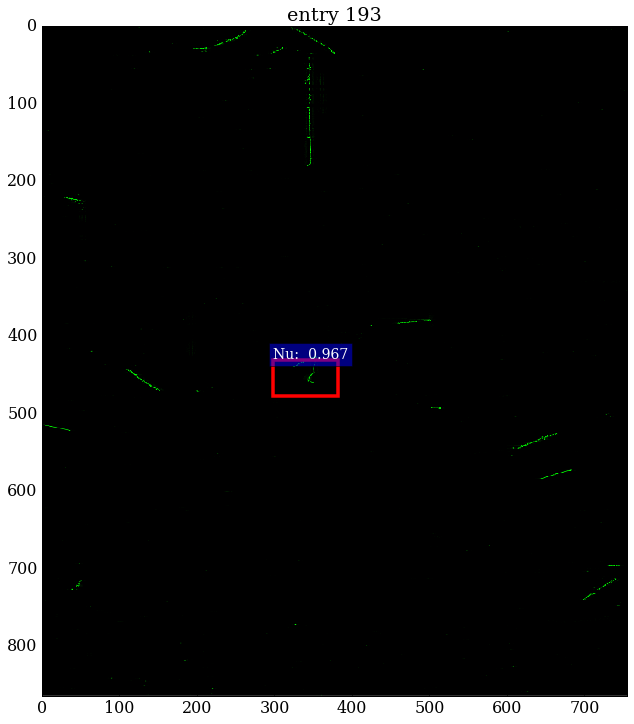

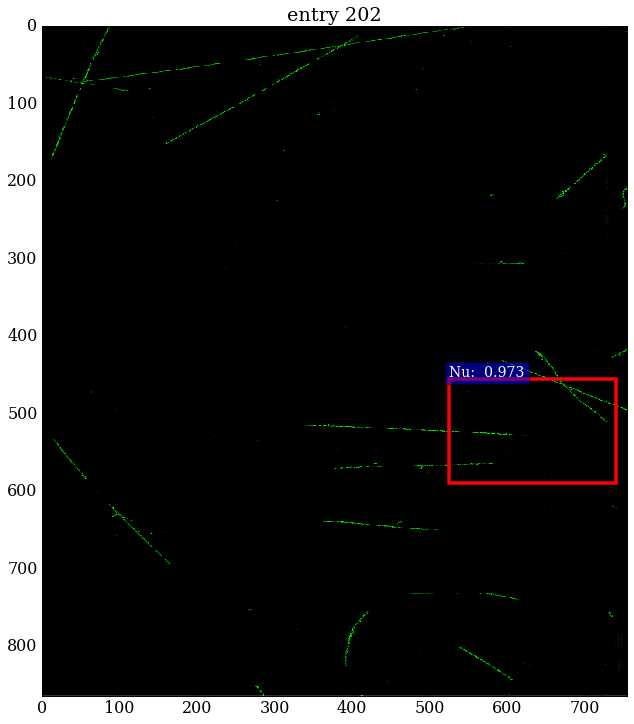

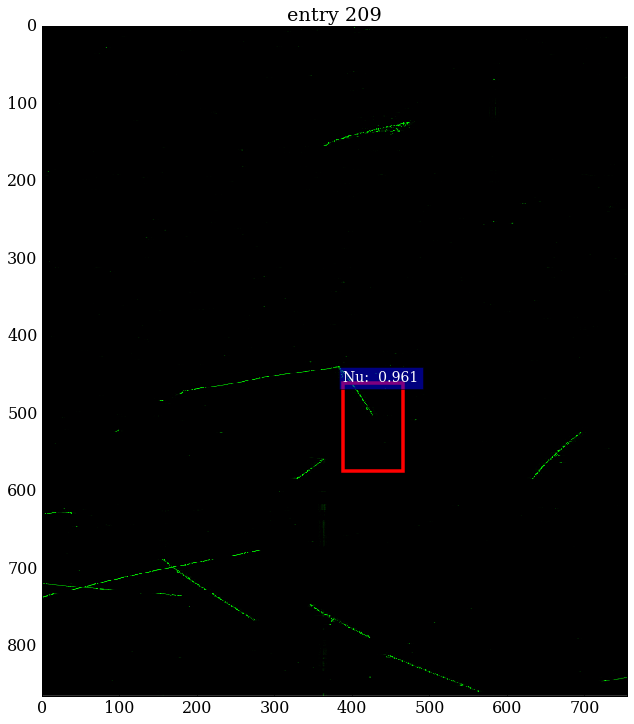

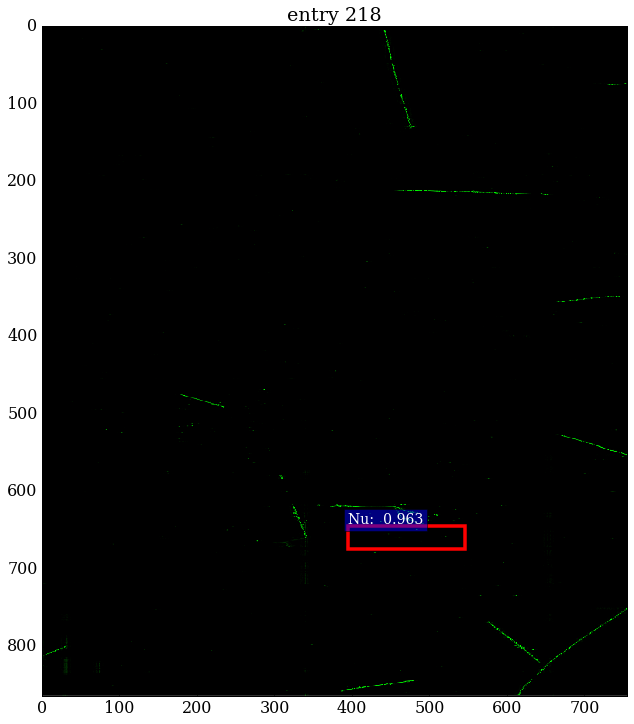

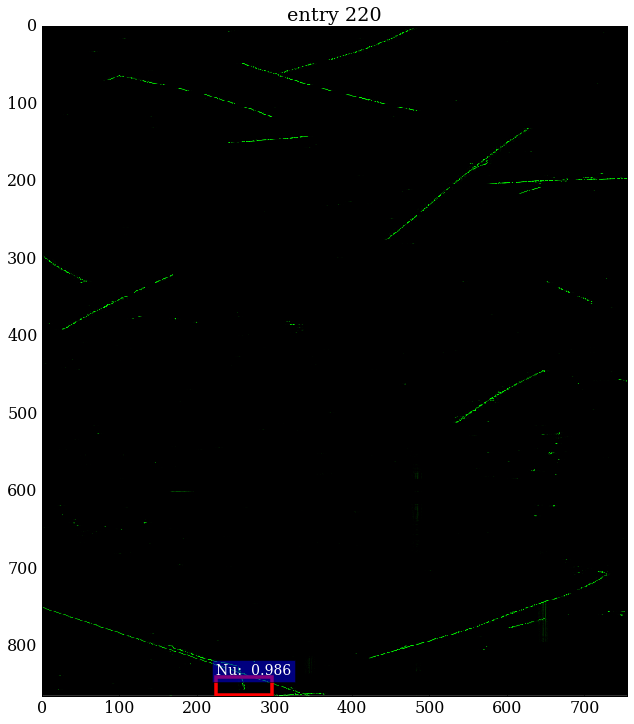

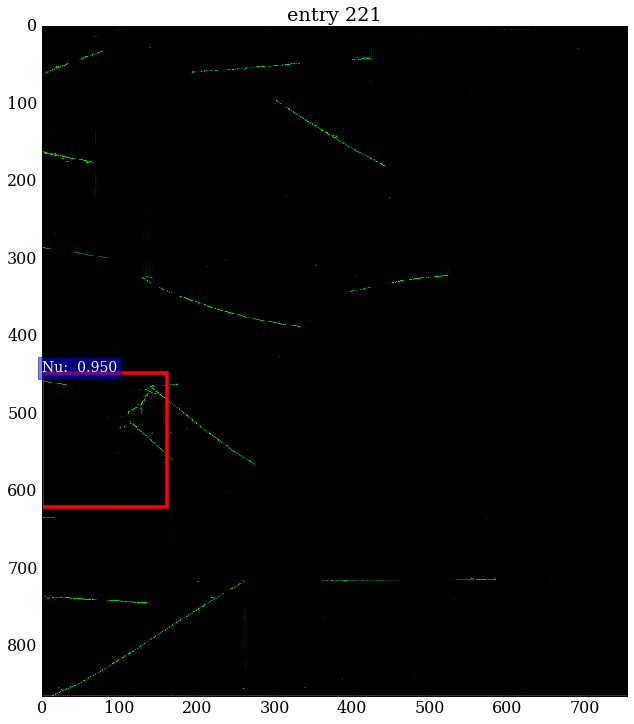

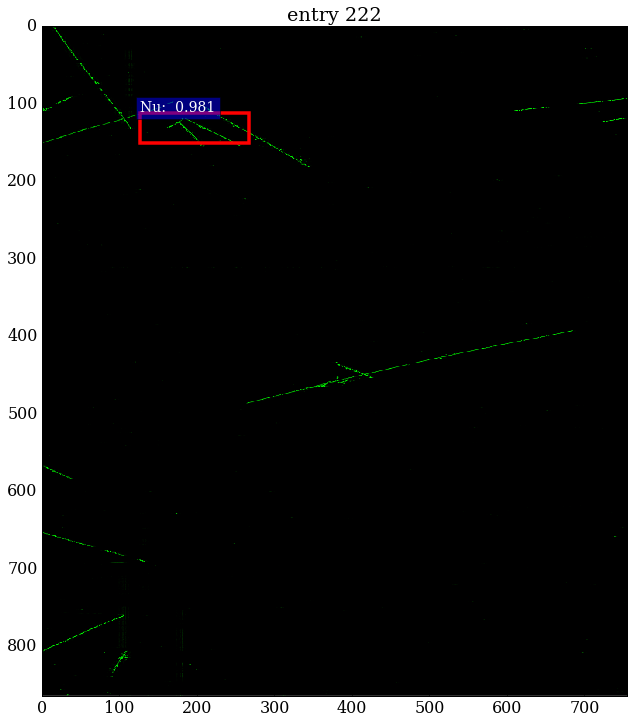

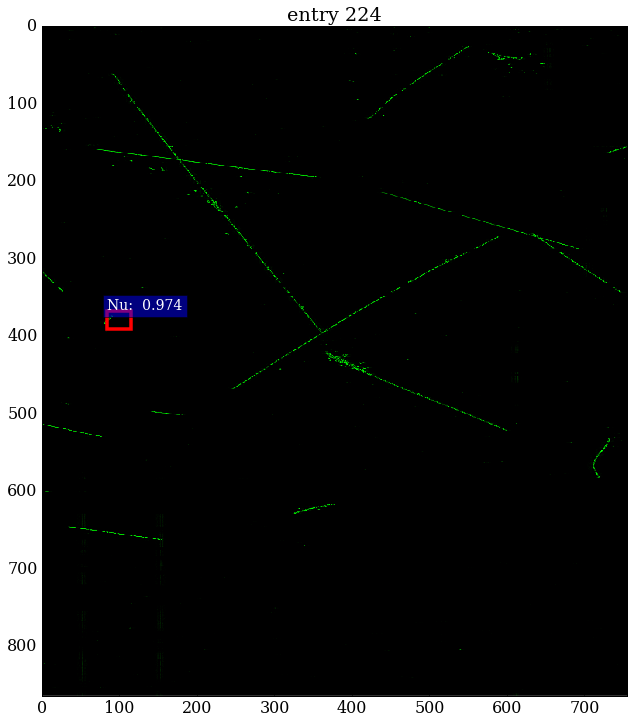

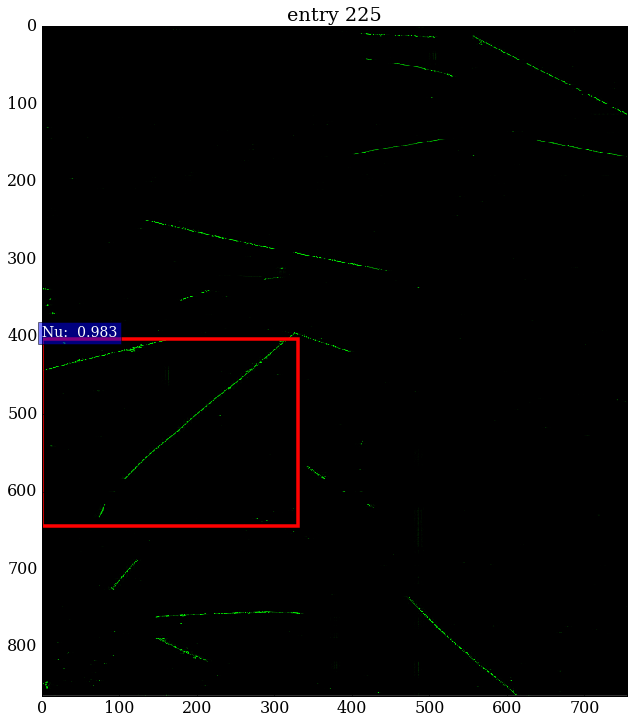

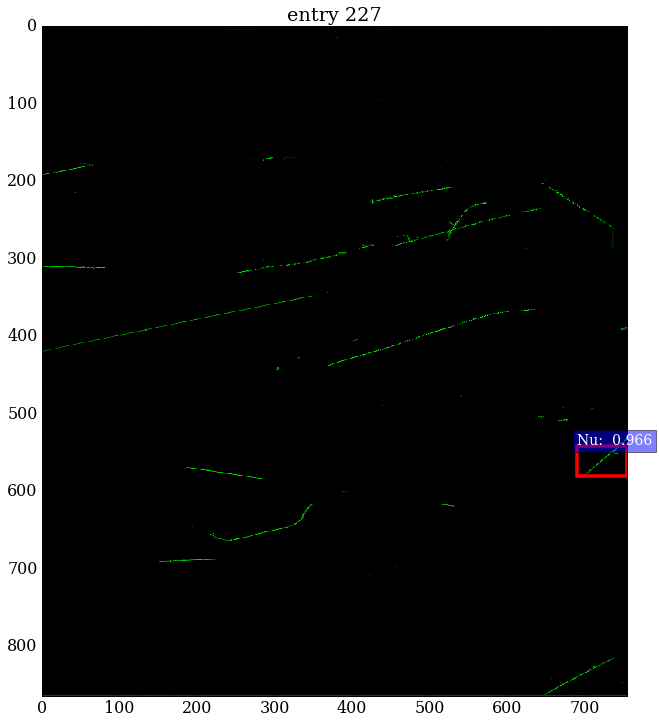

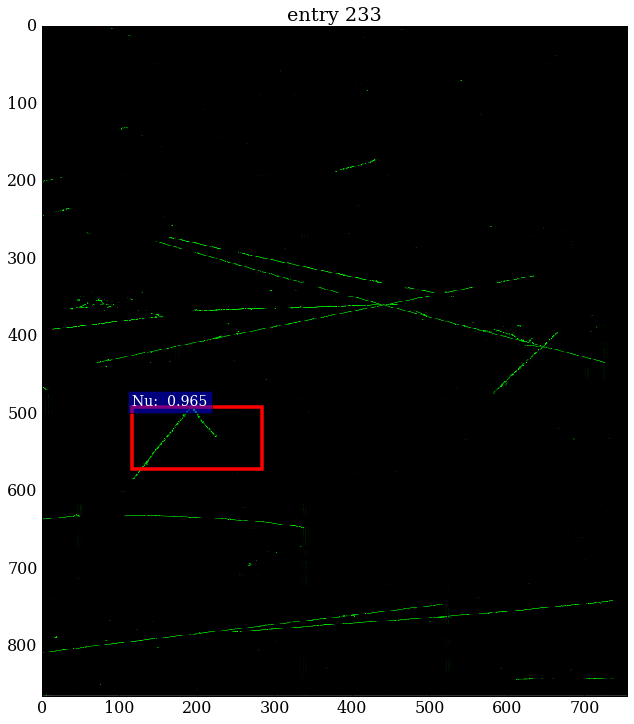

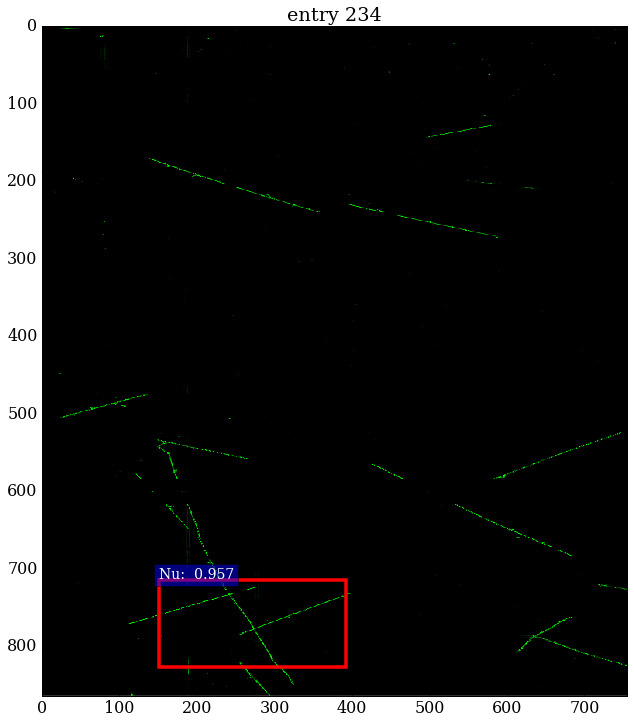

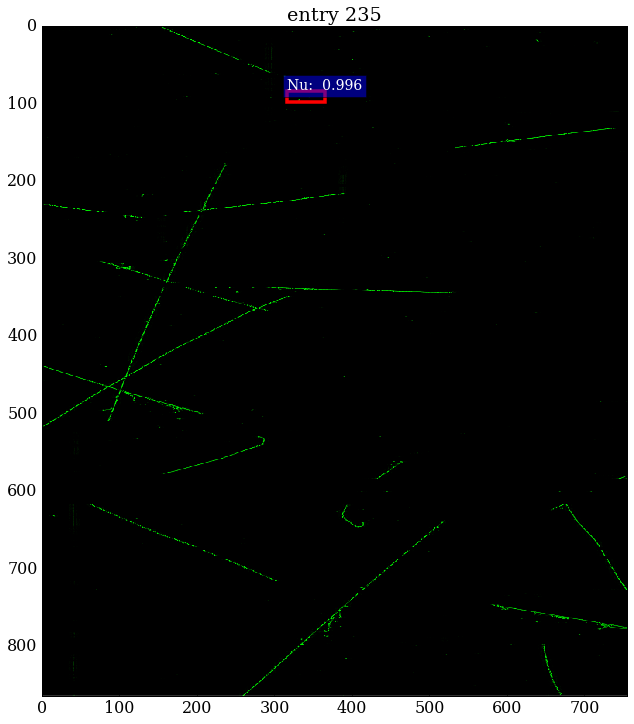

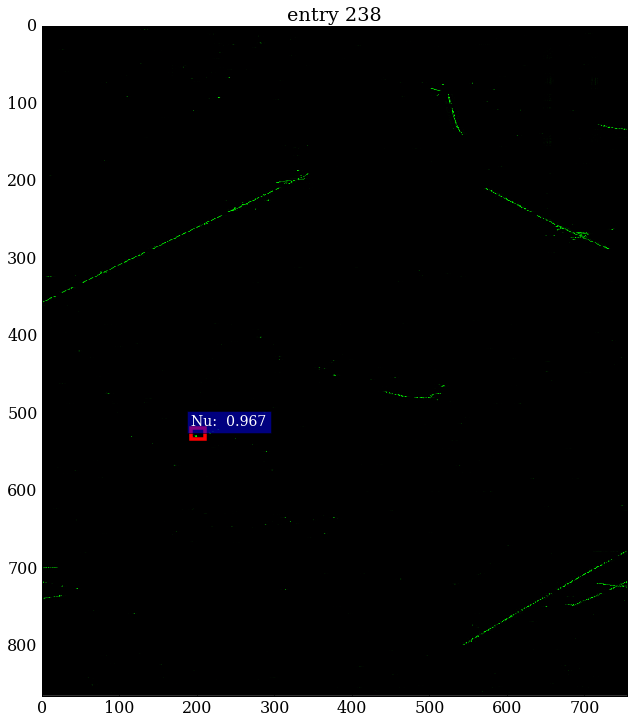

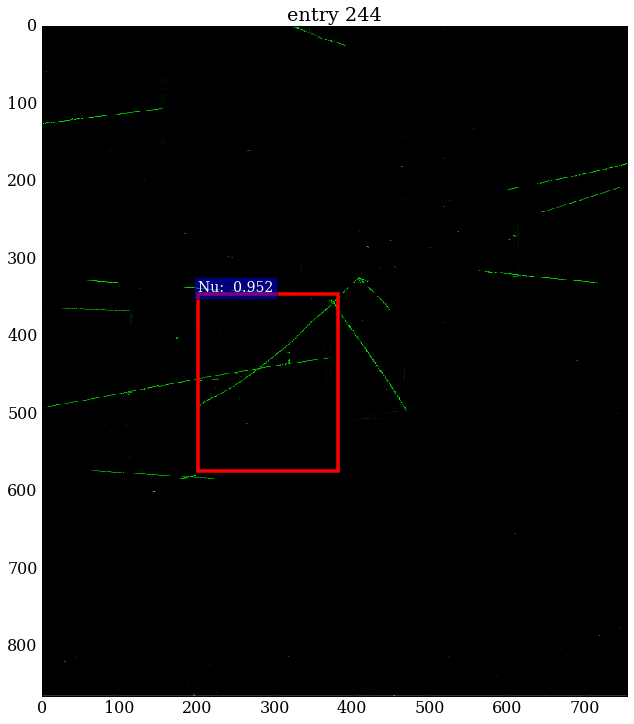

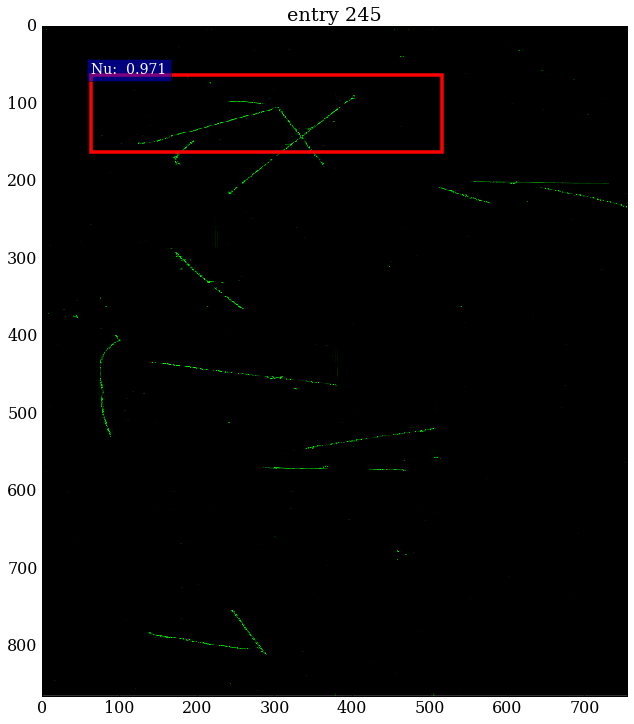

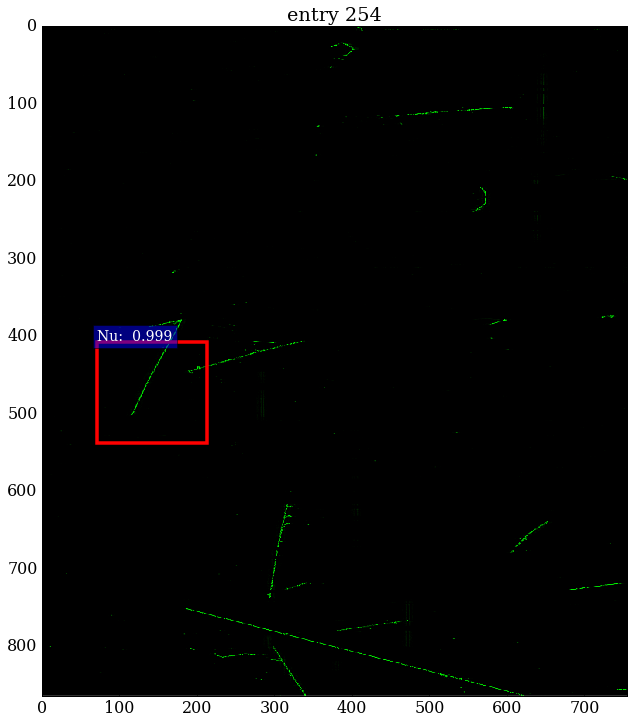

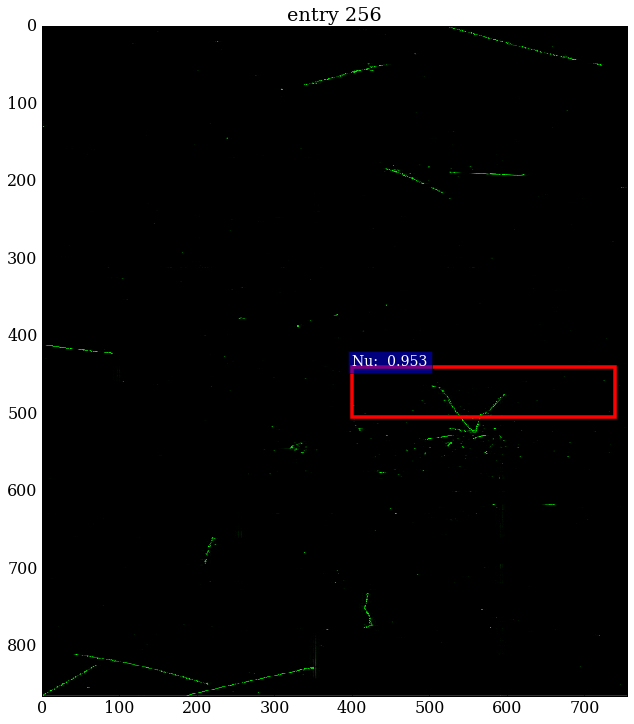

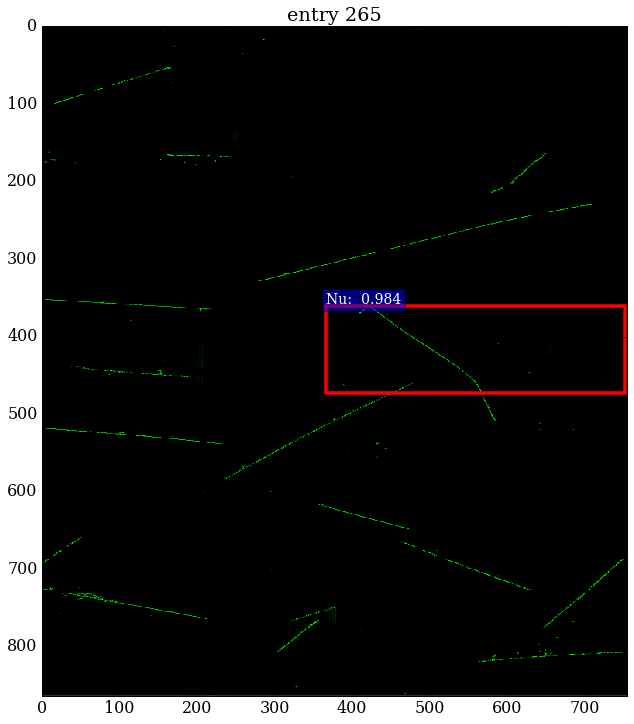

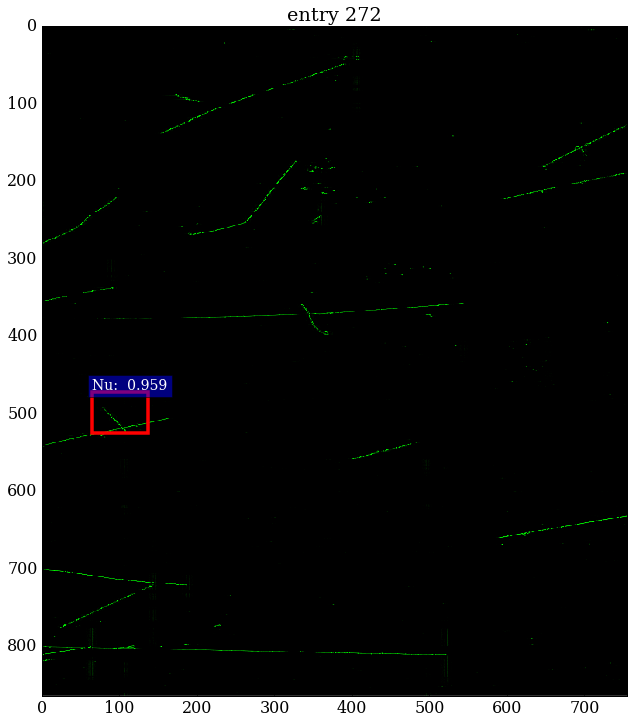

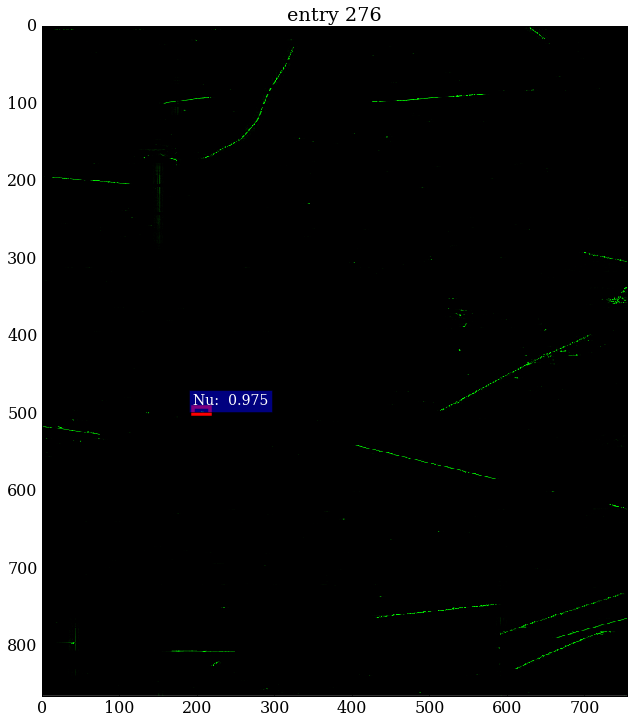

In [9]:
GT=False
for eevt in im_df['neutrino'].query('top_prob > 0.95').index.values:

    iom.read_entry(eevt)
    img = iom.get_data(larcv.kProductImage2D,"tpc")
    im  = img.Image2DArray()[2]
    im = larcv.as_ndarray(im)

    fig,ax=plt.subplots(figsize=(20,12))
    ims = np.zeros(list(im.shape)+[3])
    ims[...,1] = im

    ims[ims <  0.0] = 0.0
    ims[ims > 10.0] = 10.0

    plt.imshow(ims,cmap="Greys",interpolation='none')

    import os
    evt = eevt

    if GT:
        ANNDIR='/stage/vgenty/NuDevKitv04_brett/Annotations/'
        ann = pd.read_csv(os.path.join(ANNDIR,str(evt) + '.txt'),delimiter=' ')


    for i in xrange(1):
        ff=dframes['neutrino'].query("file=={}".format(eevt)).sort_values(by='prob',ascending=False).iloc[i]
        bbox=[ff.xmin,ff.ymin,ff.xmax,ff.ymax]
        if GT:
            abox=[ann.columns[1],ann.columns[2],ann.columns[3],ann.columns[4]]
            abox=[float(a) for a in abox]

        ax.add_patch(plt.Rectangle((bbox[0], bbox[1]),                                                                                                                       
                                    bbox[2] - bbox[0],                                                                                                                        
                                    bbox[3] - bbox[1], fill=False,                                                                                                            
                                    edgecolor='red', linewidth=3.5))  

        ax.text(bbox[0], bbox[1] - 2,                                                                                                                              
                    '{:s} {:.3f}'.format('Nu: ', ff.prob),                                                                                                           
                    bbox=dict(facecolor='blue', alpha=0.5),                                                                                                            
                    fontsize=14, color='white')      
        if GT:
            ax.add_patch(plt.Rectangle((abox[0], abox[1]),                                                                                                                       
                                        abox[2] - abox[0],                                                                                                                        
                                        abox[3] - abox[1], fill=False,                                                                                                            
                                        edgecolor='blue', linewidth=3.5))      

    ax.set_title("entry {}".format(eevt))
    plt.savefig("xiao_dump_0.95_{}.png".format(eevt),type='png')
    plt.show()

array([  1,   2,   9,  20,  21,  23,  24,  26,  30,  33,  35,  37,  42,
        45,  52,  53,  54,  60,  71,  78,  81,  82,  86,  92,  93,  95,
        97,  99, 110, 112, 122, 126, 131, 135, 141, 143, 145, 147, 155,
       156, 158, 159, 160, 161, 171, 175, 179, 185, 187, 188, 190, 198,
       199, 200, 201, 203, 205, 206, 221, 225, 233, 234, 236, 244, 245,
       254, 258, 265, 267, 269, 274, 276, 278, 285, 301, 302, 303, 307,
       310, 314, 318, 319, 322, 326, 335, 338, 343, 345, 354, 357, 358,
       364, 368, 375, 378, 386])